
** **Install Dependencies**

In [1]:
!pip install opencv-python
!pip install matplotlib


****

**Upload Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()  # Upload your dataset.zip
dataset_zip_path = list(uploaded.keys())[0]  # Get the uploaded file name


Saving dataset.zip to dataset.zip


**Extract Dataset**

In [3]:
import os
from zipfile import ZipFile

extract_path = "/content/dataset"  # Folder to extract images
os.makedirs(extract_path, exist_ok=True)

with ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to: {extract_path}")


Dataset extracted to: /content/dataset


**Set Parameters*



In [4]:
resize_width = 300     # Width in pixels
resize_height = 300    # Height in pixels
rotation_angle = 45    # Rotation angle in degrees
output_folder = "/content/processed_images"  # Folder to save processed images
os.makedirs(output_folder, exist_ok=True)


**Process Images (Resize & Rotate)**

In [5]:
import cv2
import matplotlib.pyplot as plt  # <- Make sure this line is included
import os


**(Optional) Download Processed Images as ZIP**

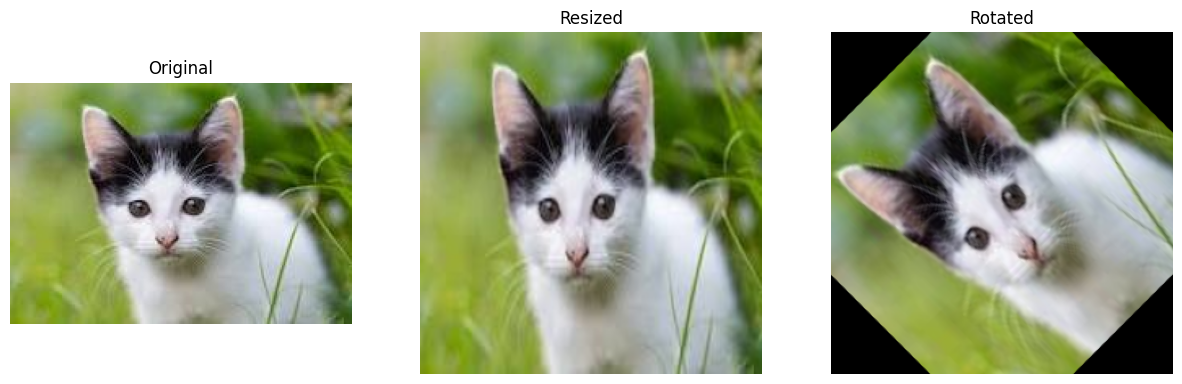

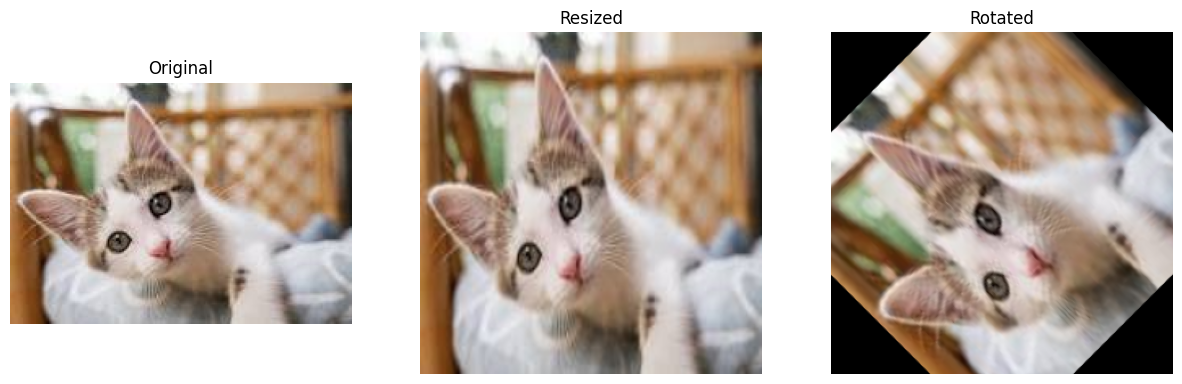

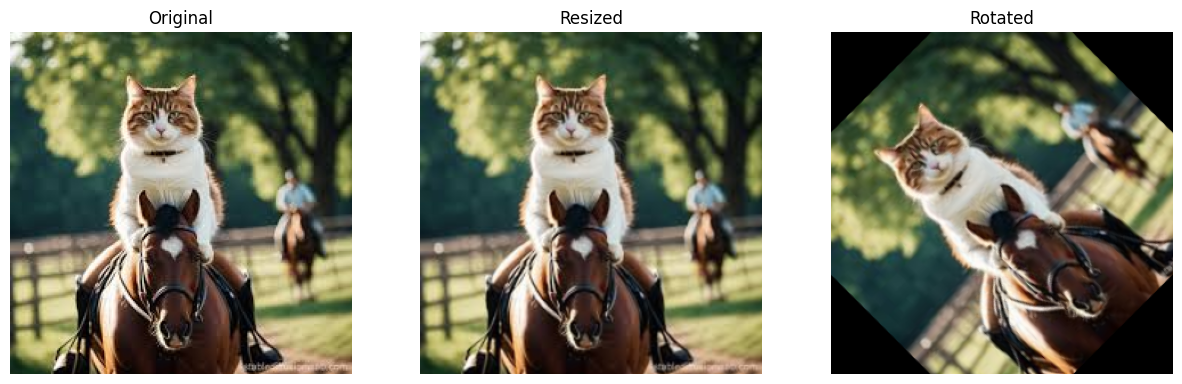

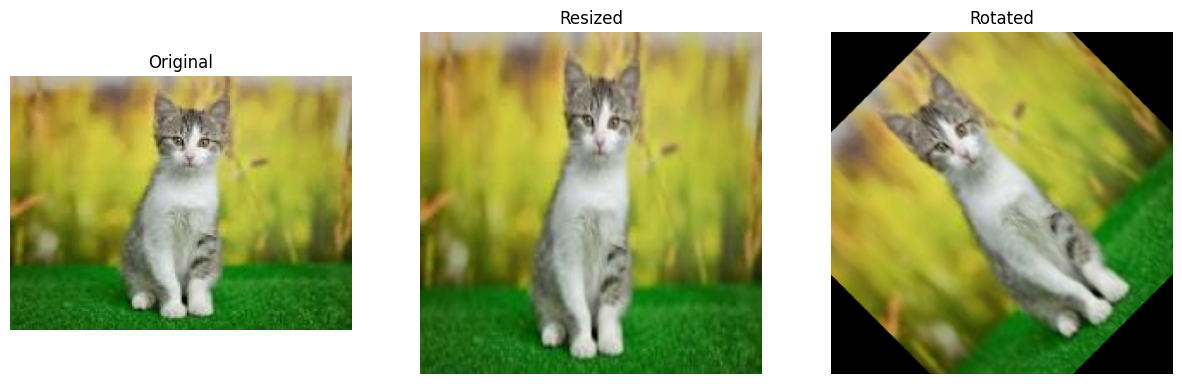

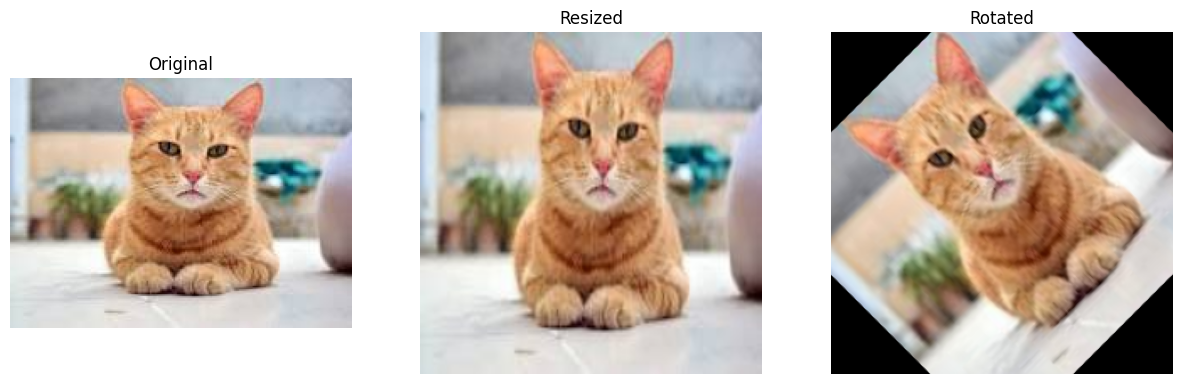

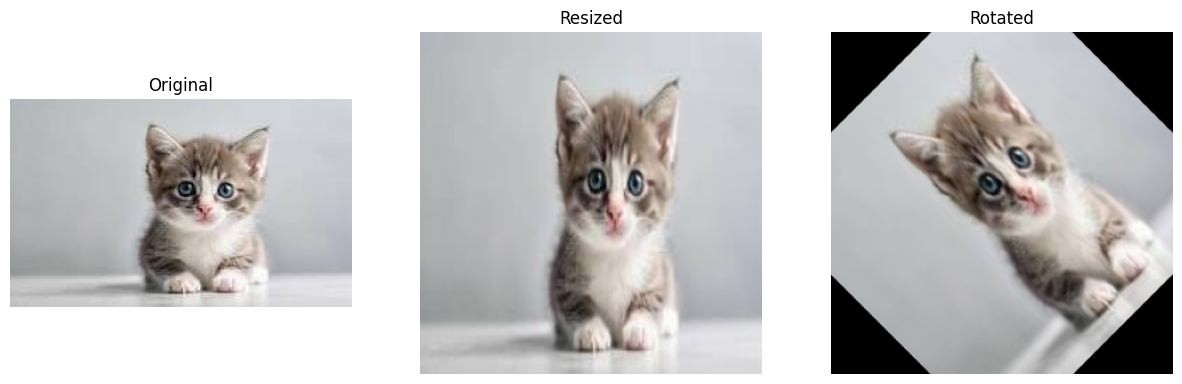

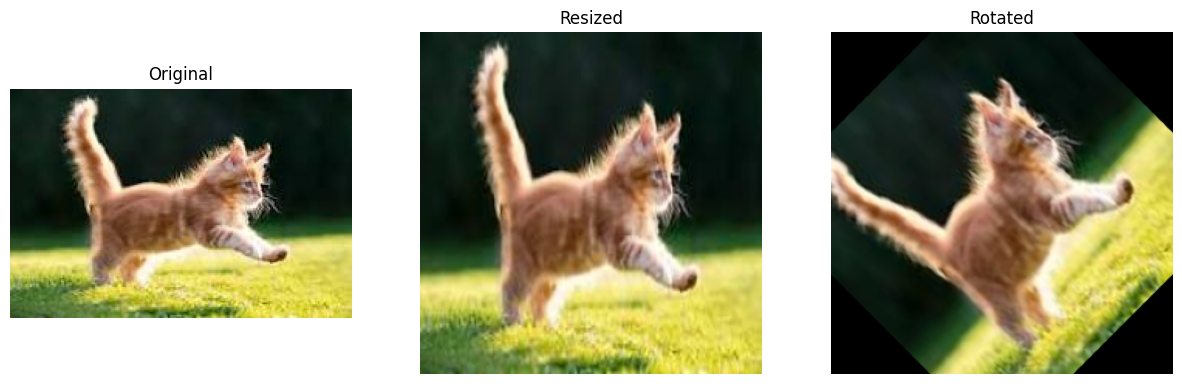

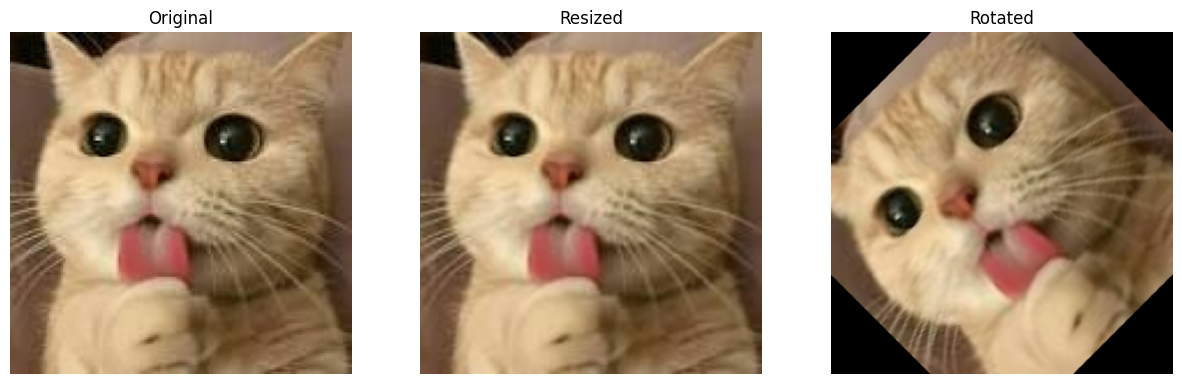

In [6]:
import cv2
import matplotlib.pyplot as plt
import os

# Your dataset folder path
extract_path = "/content/dataset"
resize_width = 300
resize_height = 300
rotation_angle = 45

for root, dirs, files in os.walk(extract_path):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(root, file)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            resized_img = cv2.resize(img_rgb, (resize_width, resize_height))
            (h, w) = resized_img.shape[:2]
            center = (w // 2, h // 2)
            M = cv2.getRotationMatrix2D(center, rotation_angle, 1.0)
            rotated_img = cv2.warpAffine(resized_img, M, (w, h))

            # Display all three images
            plt.figure(figsize=(15,5))
            plt.subplot(1,3,1)
            plt.imshow(img_rgb)
            plt.title("Original")
            plt.axis('off')

            plt.subplot(1,3,2)
            plt.imshow(resized_img)
            plt.title("Resized")
            plt.axis('off')

            plt.subplot(1,3,3)
            plt.imshow(rotated_img)
            plt.title("Rotated")
            plt.axis('off')
            plt.show()
